<a href="https://colab.research.google.com/github/Samarth-Prajapati/-Handwritten-Digits-Generator---DCGAN-Generative-Adversarial-Network-/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install kaggle

In [44]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask dataset

In [45]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d samarth2705/face-mask

Dataset URL: https://www.kaggle.com/datasets/samarth2705/face-mask
License(s): unknown
face-mask.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [47]:
!ls

 data   face-mask.zip   kaggle.json   mask.jpg	'no mask.jpg'   sample_data


Importing Dependencies

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [49]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_252.jpg', 'with_mask_790.jpg', 'with_mask_599.jpg', 'with_mask_573.jpg', 'with_mask_1030.jpg']
['with_mask_1319.jpg', 'with_mask_1744.jpg', 'with_mask_1159.jpg', 'with_mask_729.jpg', 'with_mask_1087.jpg']


In [50]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1338.jpg', 'without_mask_832.jpg', 'without_mask_1744.jpg', 'without_mask_3232.jpg', 'without_mask_442.jpg']
['without_mask_2011.jpg', 'without_mask_1109.jpg', 'without_mask_2750.jpg', 'without_mask_2748.jpg', 'without_mask_3603.jpg']


In [51]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for two class of Images
with mask - 1
without mask - 0

In [52]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [53]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [54]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [55]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

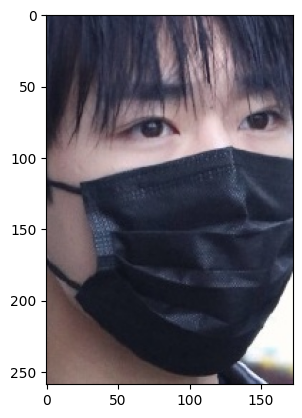

In [56]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1540.jpg')
imgplot = plt.imshow(img)
plt.show()

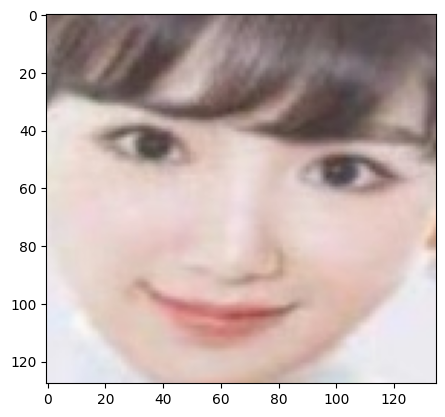

In [57]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2924.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images
2. Convert the images to numpy arrays

In [58]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [59]:
type(data)

list

In [60]:
len(data)

7553

array([[[107, 111, 123],
        [107, 111, 123],
        [106, 110, 122],
        ...,
        [111, 115, 127],
        [112, 116, 128],
        [112, 116, 128]],

       [[107, 111, 123],
        [107, 111, 123],
        [106, 110, 122],
        ...,
        [111, 115, 127],
        [112, 116, 128],
        [112, 116, 128]],

       [[106, 111, 123],
        [106, 111, 123],
        [105, 110, 122],
        ...,
        [110, 114, 126],
        [110, 114, 126],
        [110, 114, 126]],

       ...,

       [[159, 128, 109],
        [160, 129, 110],
        [161, 130, 111],
        ...,
        [ 90,  76,  67],
        [ 91,  77,  68],
        [ 92,  78,  69]],

       [[156, 128, 109],
        [157, 129, 110],
        [158, 130, 111],
        ...,
        [ 93,  79,  70],
        [ 94,  80,  71],
        [ 95,  81,  72]],

       [[154, 128, 109],
        [155, 129, 110],
        [156, 130, 111],
        ...,
        [ 95,  81,  72],
        [ 96,  82,  73],
        [ 97,  83,  74]]], dtype=uint8)
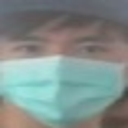

In [61]:
data[0]

In [62]:
type(data[0])

numpy.ndarray

In [63]:
data[0].shape

(128, 128, 3)

In [64]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [65]:
print(type(X),type(X))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [66]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [67]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [70]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[217, 213, 204],
        [217, 213, 204],
        [217, 213, 204],
        ...,
        [221, 217, 210],
        [220, 217, 211],
        [221, 217, 212]],

       [[216, 213, 204],
        [217, 213, 205],
        [217, 213, 205],
        ...,
        [221, 218, 211],
        [221, 217, 212],
        [221, 217, 211]],

       [[217, 213, 204],
        [217, 213, 204],
        [217, 213, 204],
        ...,
        [221, 217, 212],
        [221, 217, 212],
        [221, 218, 212]],

       ...,

       [[217, 214, 209],
        [216, 214, 209],
        [218, 215, 210],
        ...,
        [251, 248, 254],
        [250, 247, 254],
        [250, 248, 254]],

       [[216, 214, 209],
        [216, 215, 210],
        [217, 215, 210],
        ...,
        [251, 248, 255],
        [251, 248, 255],
        [251, 248, 255]],

       [[216, 214, 209],
        [216, 214, 209],
        [216, 215, 210],
        ...,
        [251, 248, 255],
        [251, 248, 255],
        [251, 248, 255]]], dtype=uint8)
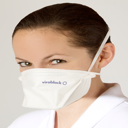

In [71]:
X_train[0]

In [72]:
X_train_scaled[0]

array([[[0.85098039, 0.83529412, 0.8       ],
        [0.85098039, 0.83529412, 0.8       ],
        [0.85098039, 0.83529412, 0.8       ],
        ...,
        [0.86666667, 0.85098039, 0.82352941],
        [0.8627451 , 0.85098039, 0.82745098],
        [0.86666667, 0.85098039, 0.83137255]],

       [[0.84705882, 0.83529412, 0.8       ],
        [0.85098039, 0.83529412, 0.80392157],
        [0.85098039, 0.83529412, 0.80392157],
        ...,
        [0.86666667, 0.85490196, 0.82745098],
        [0.86666667, 0.85098039, 0.83137255],
        [0.86666667, 0.85098039, 0.82745098]],

       [[0.85098039, 0.83529412, 0.8       ],
        [0.85098039, 0.83529412, 0.8       ],
        [0.85098039, 0.83529412, 0.8       ],
        ...,
        [0.86666667, 0.85098039, 0.83137255],
        [0.86666667, 0.85098039, 0.83137255],
        [0.86666667, 0.85490196, 0.83137255]],

       ...,

       [[0.85098039, 0.83921569, 0.81960784],
        [0.84705882, 0.83921569, 0.81960784],
        [0.85490196, 0

Building CNN

In [73]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [74]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [75]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - acc: 0.6741 - loss: 0.7184 - val_acc: 0.8711 - val_loss: 0.2947
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.8864 - loss: 0.3079 - val_acc: 0.8893 - val_loss: 0.2796
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.8952 - loss: 0.2609 - val_acc: 0.8909 - val_loss: 0.2385
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9156 - loss: 0.2237 - val_acc: 0.8893 - val_loss: 0.2650
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9233 - loss: 0.1957 - val_acc: 0.8942 - val_loss: 0.2655


Model Evaluation

In [76]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9146 - loss: 0.2215
Test Accuracy = 0.9106552004814148


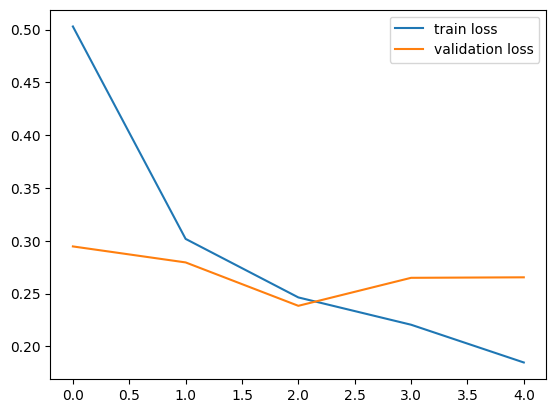

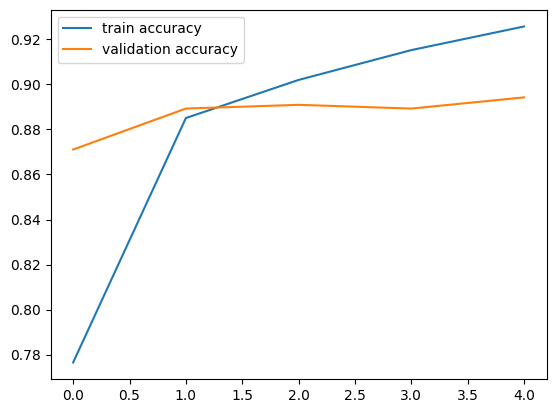

In [77]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/mask.jpg


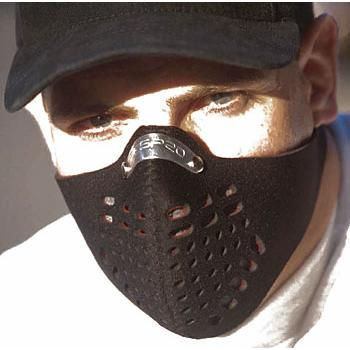

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.09485141 0.87212265]]
1
The person in the image is wearing a mask


In [79]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')